<a href="https://colab.research.google.com/github/nbilasals/employee_attrition/blob/main/Copy_of_2_bsmote_try_final_employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

#MODEL SELECTION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#FEATURE IMPORTANCE
from sklearn.inspection import permutation_importance

In [2]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read Dataset 
df = pd.read_csv("/content/drive/My Drive/dataset/project/employee_attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Exploratory Data Analysis**

In [4]:
#Get to see missing values, unique valuse and data type of each columns
col_summary = pd.DataFrame(df.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in df.columns:
    na_list.append(df[col].isna().sum())
    unique_list.append(df[col].nunique())
    dtype_list.append(df[col].dtype)
    
col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

,Column,Missing values,Unique values,Data type
0,Age,0,43,int64
1,Attrition,0,2,object
2,BusinessTravel,0,3,object
3,DailyRate,0,886,int64
4,Department,0,3,object
5,DistanceFromHome,0,29,int64
6,Education,0,5,int64
7,EducationField,0,6,object
8,EmployeeCount,0,1,int64
9,EmployeeNumber,0,1470,int64


In [5]:
df.shape

(1470, 35)

In [6]:
#Numeric Values
df.select_dtypes('int64' ,'float64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
#Categorical Values
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
#Statistical value of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Data Visualization**

No     1233
Yes     237
Name: Attrition, dtype: int64


Text(0.5, 1.0, 'Attrition')

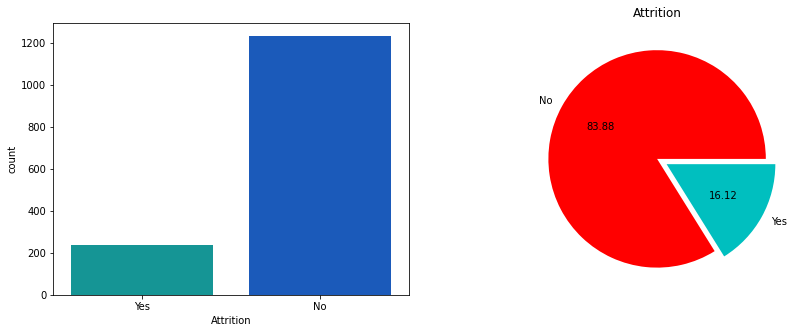

In [9]:
#Distribution of target variable
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df, palette='winter_r') 
plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts() ,colors =['r' ,'c'] ,explode =[0,0.1]  ,autopct = '%.2f' ,labels =['No' ,'Yes'])
plt.title('Attrition')

We can observe that number of “No” is far more than “Yes” which indicates that our data is imbalanced. We'll work on this imbalanced problem later.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


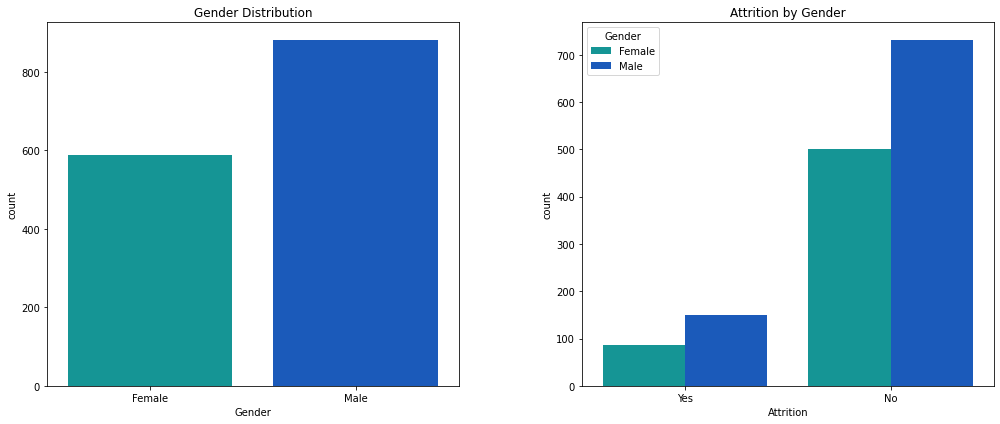

In [10]:
plt.figure(figsize =(14,6))
plt.subplot(1,2,1)

#Gender Distribution
sns.countplot('Gender' ,data = df, palette='winter_r')
plt.title('Gender Distribution')
plt.tight_layout()

plt.subplot(1,2,2)

#Attrition by Gender
sns.countplot(df['Attrition'] ,hue =df['Gender'], palette='winter_r')
plt.title('Attrition by Gender')

plt.subplots_adjust(wspace=0.3)

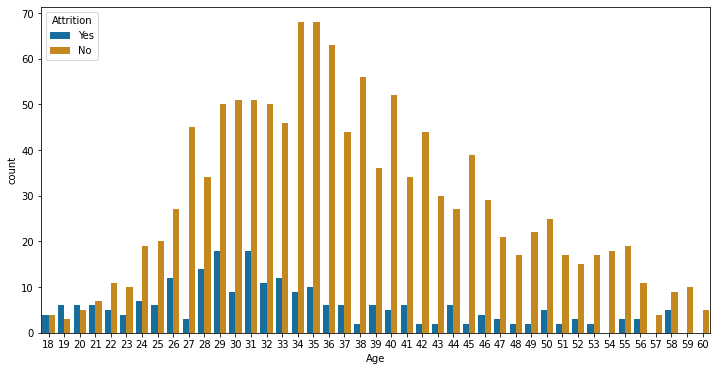

In [11]:
#Show the number of employyes that left and stayed by age
plt.subplots(figsize=(12,6))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


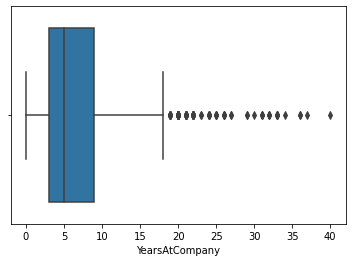

In [12]:
#Years at Company
sns.boxplot(df["YearsAtCompany"])

We can clearly see that the majority of the employees are males, so attritions are higher but slightly. I don't think gender is too significant a factor behind attritions.

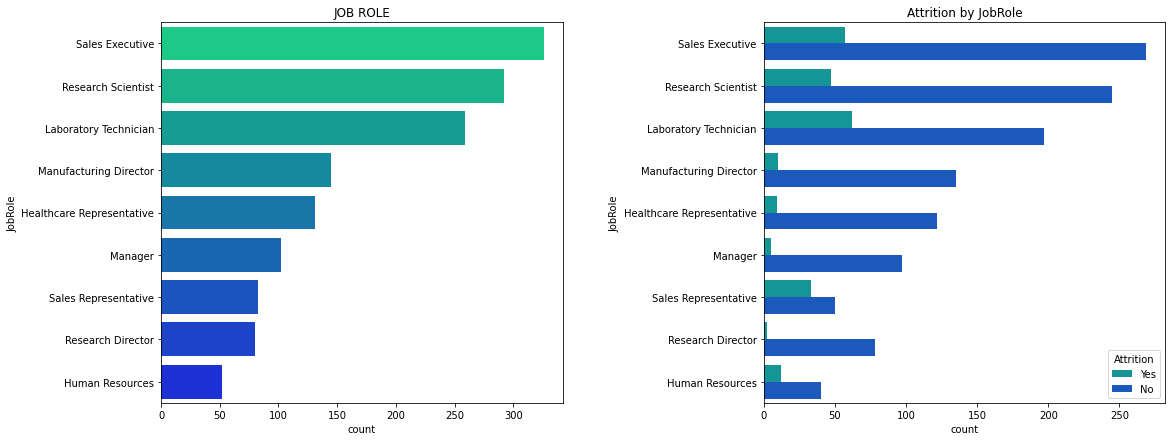

In [13]:
plt.figure(figsize = (18 , 7))
plt.subplot(1,2,1)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r')
plt.title('JOB ROLE')
plt.subplot(1,2,2)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r'  ,hue =df['Attrition'])
plt.title('Attrition by JobRole')

plt.subplots_adjust(wspace=0.5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by Department')

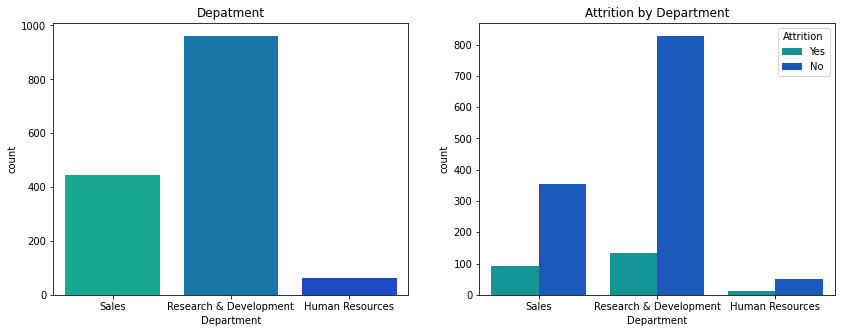

In [14]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('Department' ,data = df, palette='winter_r')
plt.title('Depatment')
plt.subplot(1,2,2)
sns.countplot('Department' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by Department')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by BusinessTravel')

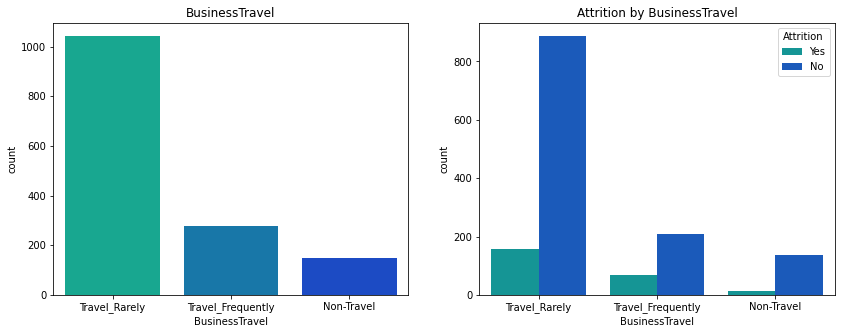

In [15]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('BusinessTravel' ,data = df, palette='winter_r')
plt.title('BusinessTravel')
plt.subplot(1,2,2)
sns.countplot('BusinessTravel' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by BusinessTravel')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by JobSatisfaction')

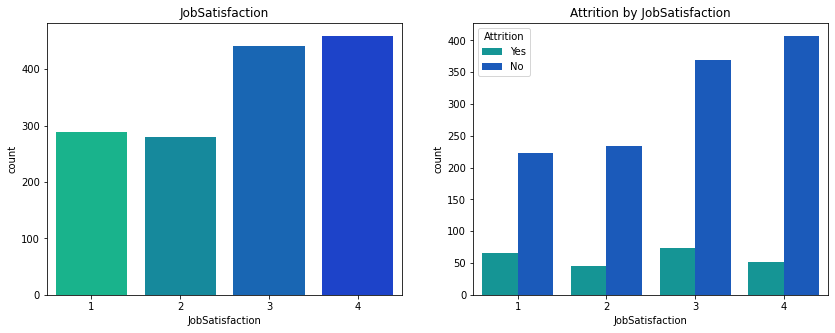

In [16]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('JobSatisfaction' ,data = df, palette='winter_r')
plt.title('JobSatisfaction')
plt.subplot(1,2,2)
sns.countplot('JobSatisfaction' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by JobSatisfaction')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by EnvironmentSatisfaction')

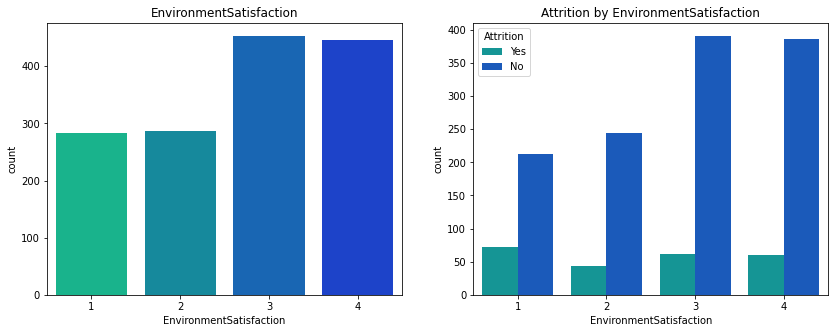

In [17]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('EnvironmentSatisfaction' ,data = df, palette='winter_r')
plt.title('EnvironmentSatisfaction')
plt.subplot(1,2,2)
sns.countplot('EnvironmentSatisfaction' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by EnvironmentSatisfaction')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by JobInvolvement')

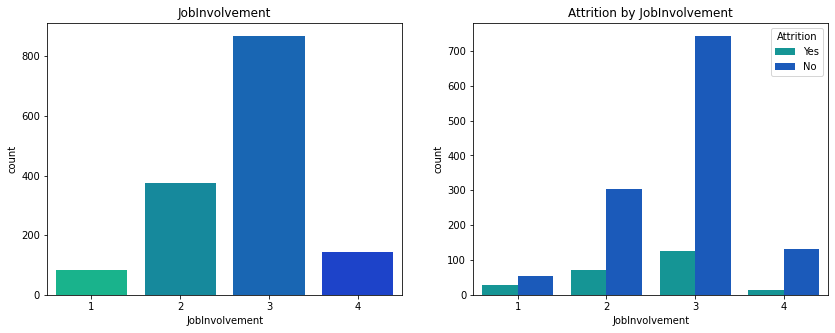

In [18]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('JobInvolvement' ,data = df, palette='winter_r')
plt.title('JobInvolvement')
plt.subplot(1,2,2)
sns.countplot('JobInvolvement' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by JobInvolvement')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by PerformanceRating')

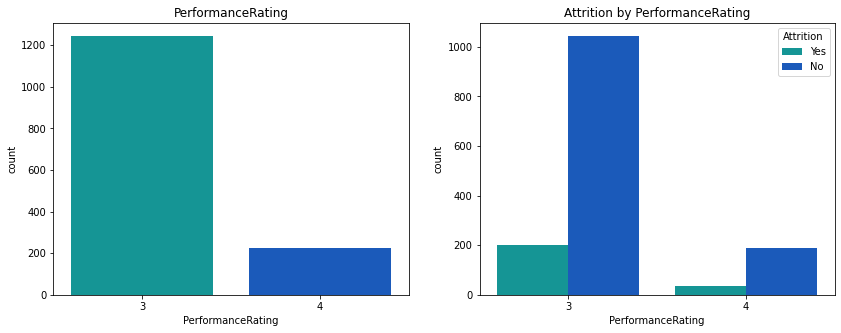

In [19]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('PerformanceRating' ,data = df, palette='winter_r')
plt.title('PerformanceRating')
plt.subplot(1,2,2)
sns.countplot('PerformanceRating' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by PerformanceRating')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by RelationshipSatisfaction')

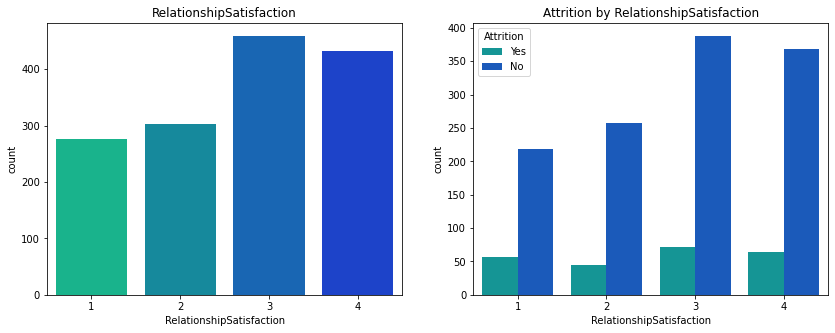

In [20]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('RelationshipSatisfaction' ,data = df, palette='winter_r')
plt.title('RelationshipSatisfaction')
plt.subplot(1,2,2)
sns.countplot('RelationshipSatisfaction' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by RelationshipSatisfaction')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

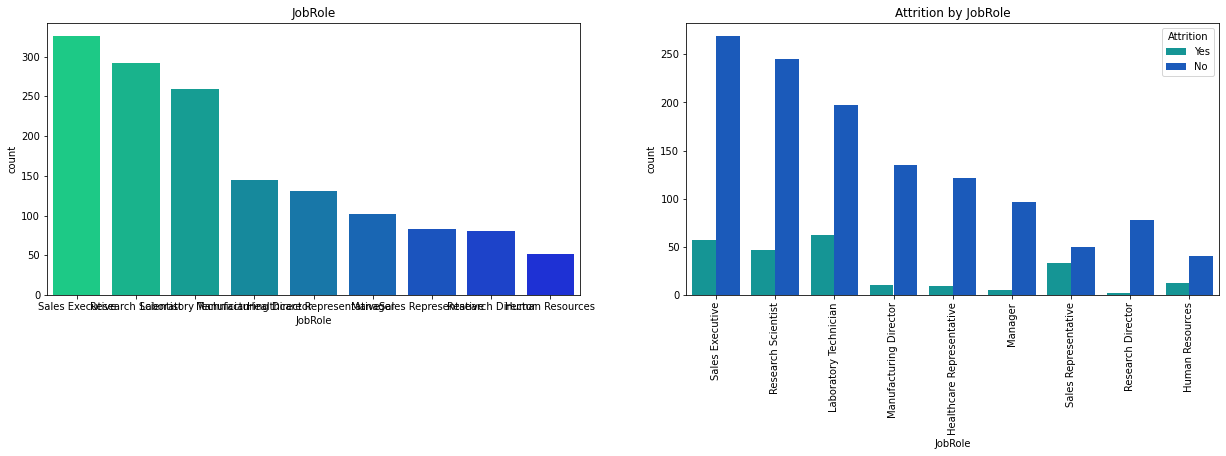

In [21]:
plt.figure(figsize =(21,5))
plt.subplot(1,2,1)
sns.countplot('JobRole' ,data = df, palette='winter_r')
plt.title('JobRole')
plt.subplot(1,2,2)
sns.countplot('JobRole' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by JobRole')
plt.xticks(rotation=90)

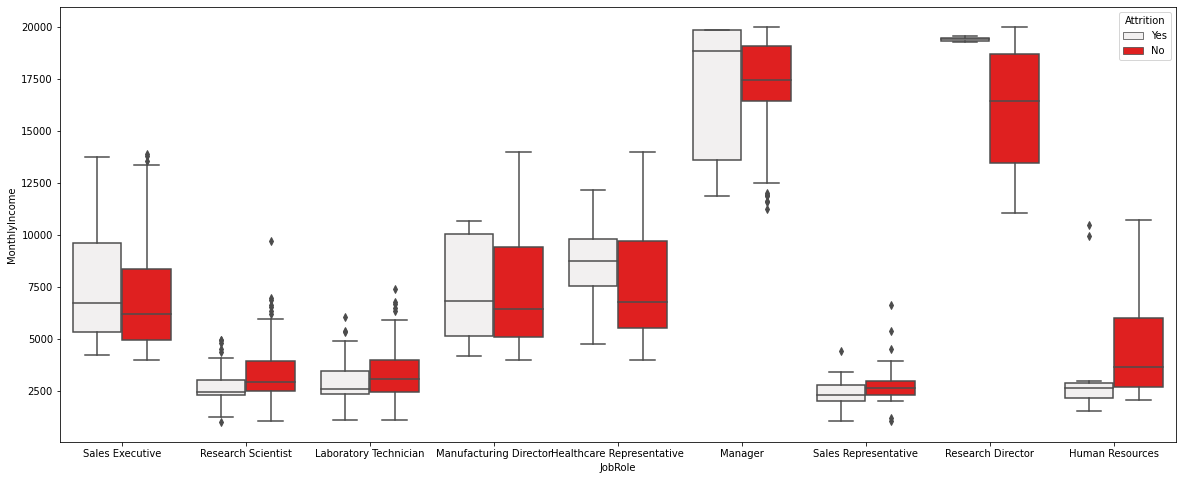

In [22]:
plt.figure(figsize =(20 ,8))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome' ,data = df ,hue ='Attrition' ,color ='red')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

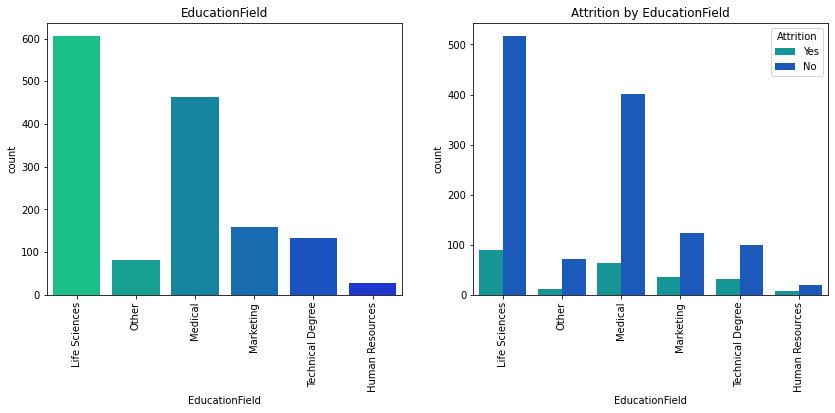

In [23]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('EducationField' ,data = df, palette='winter_r')
plt.title('EducationField')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot('EducationField' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by EducationField')
plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by OverTime')

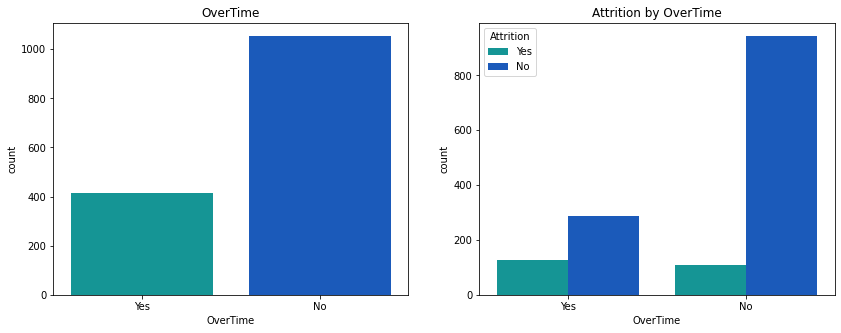

In [24]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('OverTime' ,data = df, palette='winter_r')
plt.title('OverTime')
plt.subplot(1,2,2)
sns.countplot('OverTime' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by OverTime')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition by MaritalStatus')

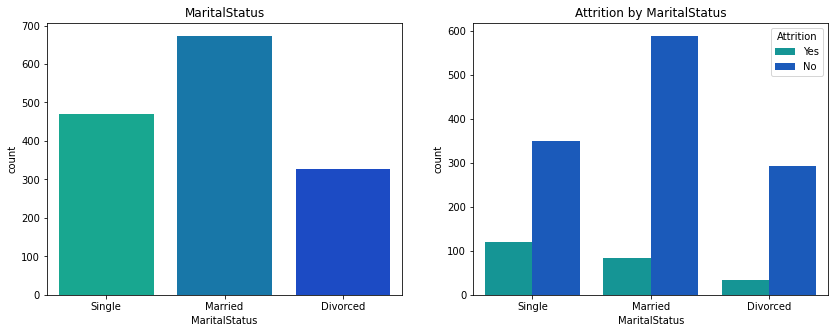

In [25]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('MaritalStatus' ,data = df, palette='winter_r')
plt.title('MaritalStatus')
plt.subplot(1,2,2)
sns.countplot('MaritalStatus' ,data = df ,hue ='Attrition', palette='winter_r' )
plt.title('Attrition by MaritalStatus')

**Feature Engineering**

In [26]:
# Dropping columns with little to no useful information
df = df.drop(['EmployeeCount',
                 'EmployeeNumber',
                 'Over18',
                  'StandardHours'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [27]:
#Binary Features Encoding

y_n_type = []
others =[]
for col in df.select_dtypes('object').columns:
    if(len(df[col].unique()) ==2):
        y_n_type.append(col)
        
y_n_type    

['Attrition', 'Gender', 'OverTime']

In [28]:
df['Gender'].replace({'Male':1 ,'Female':0} ,inplace = True)
df['OverTime'].replace({'Yes':1 ,'No':0} ,inplace = True)
df['Attrition'].replace({'Yes':1 ,'No':0} ,inplace = True)

In [29]:
#categorical features encoding

others = df.select_dtypes('object').columns
others

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [30]:
le = LabelEncoder()
for col in others:
    df[col] = le.fit_transform(df[col])

In [31]:
# Checking for missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [32]:
#SPLITTING DATASET INTO FEATURES -> X AND TARGET -> Y

X = df.drop('Attrition' ,axis =1)
y = df['Attrition']

print(X.shape ,y.shape)

(1470, 30) (1470,)


In [33]:
# Rescaling Data
Scaler = StandardScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']
X[Scaling_Cols] = Scaler.fit_transform(X[Scaling_Cols])

In [34]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2,0.742527,2,-1.010909,2,1,2,0,1.383138,...,3,1,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,1,-1.297775,1,-0.147150,1,1,3,1,-0.240677,...,4,4,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2,1.414363,1,-0.887515,2,4,4,1,1.284725,...,3,2,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1,1.461466,1,-0.764121,4,1,4,0,-0.486709,...,3,3,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,2,-0.524295,1,-0.887515,1,3,1,1,-1.274014,...,3,4,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1,0.202082,1,1.703764,2,3,3,1,-1.224807,...,3,3,1,0.735447,0.155707,3,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,2,-0.469754,1,-0.393938,1,3,4,1,-1.175601,...,3,1,1,-0.293077,1.707500,3,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,2,-1.605183,1,-0.640727,3,1,2,1,1.038693,...,4,2,1,-0.678774,-2.171982,3,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,1,0.546677,2,-0.887515,3,3,4,1,-0.142264,...,3,4,0,0.735447,0.155707,2,0.325228,0.488900,-0.679146,1.086895


**Feature Selection**

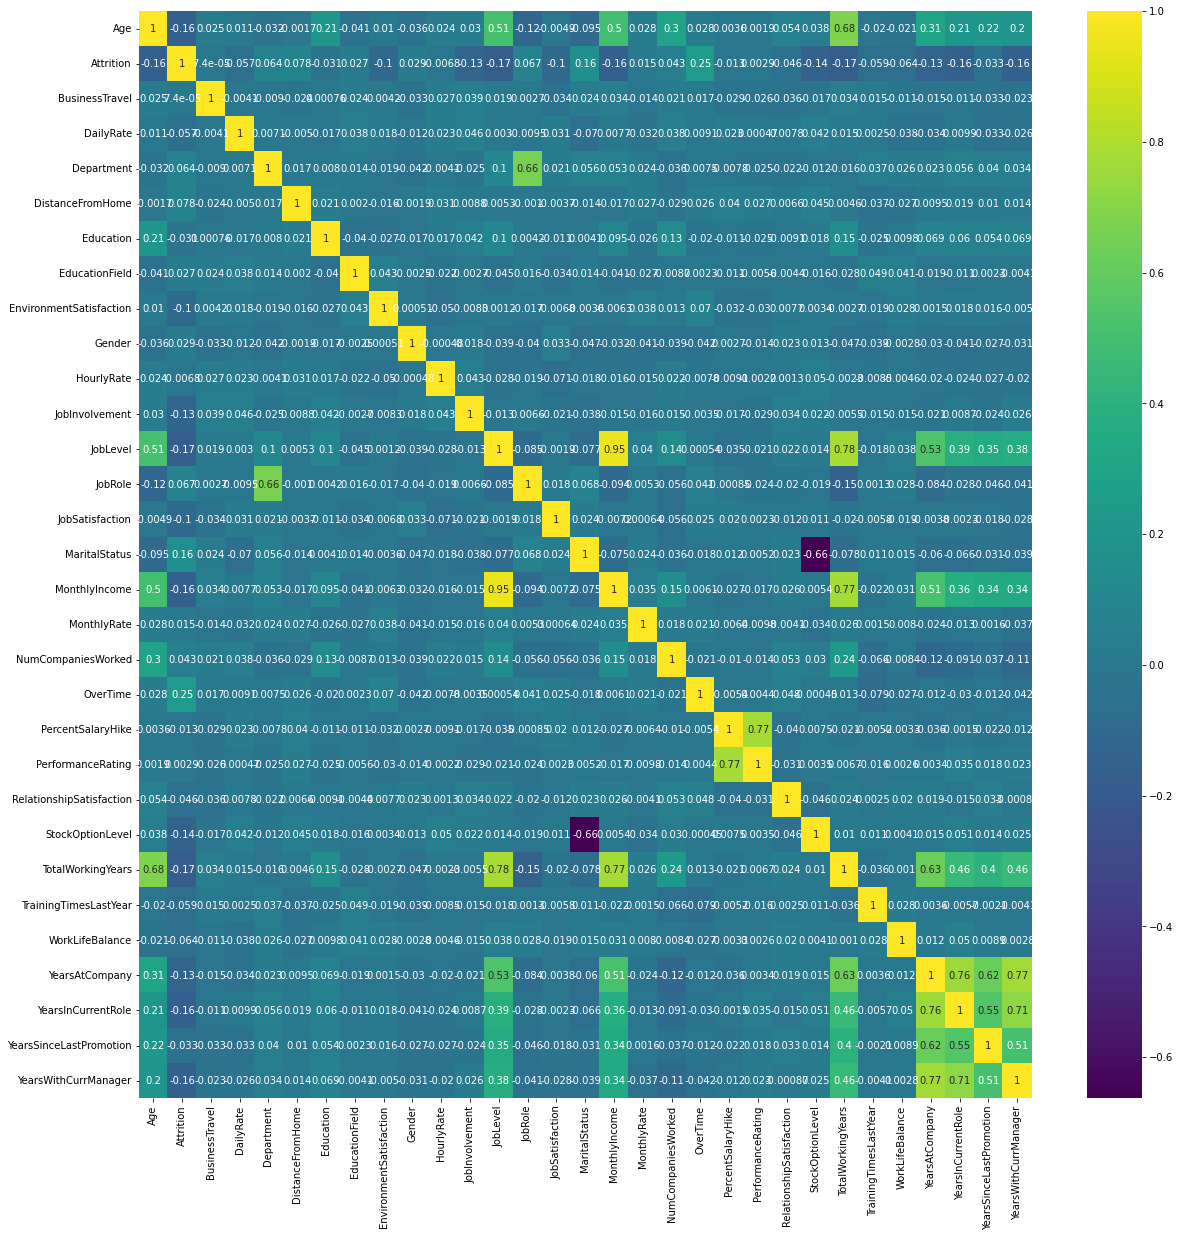

In [35]:
#correlation matrix
plt.figure(figsize = (20 ,20))
sns.heatmap(df.corr() ,cmap = 'viridis' , cbar = True , annot = True)

**Handling Imbalance**

In [36]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [37]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  1726
X test size:  740
y train size:  1726
y test size:  740


0    1233
1     237
Name: Attrition, dtype: int64


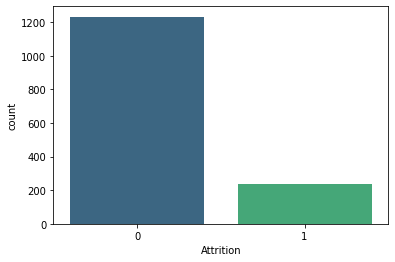

In [38]:
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df, palette='viridis')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Now Class is Balanced')

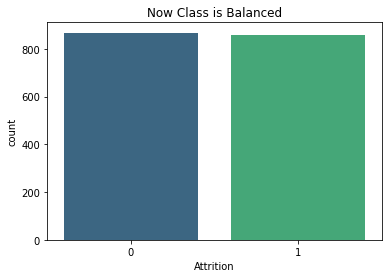

In [39]:
#now balanced
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Now Class is Balanced')

In [40]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2,0.742527,2,-1.010909,2,1,2,0,1.383138,...,3,1,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,1,-1.297775,1,-0.147150,1,1,3,1,-0.240677,...,4,4,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2,1.414363,1,-0.887515,2,4,4,1,1.284725,...,3,2,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1,1.461466,1,-0.764121,4,1,4,0,-0.486709,...,3,3,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,2,-0.524295,1,-0.887515,1,3,1,1,-1.274014,...,3,4,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-1.881796,1,-0.336201,2,-0.907155,1,4,1,0,1.029240,...,3,3,0,-1.226624,-0.170493,3,-0.860391,-0.847644,-0.499226,-0.830958
2462,0.873853,2,0.770677,1,0.063051,3,4,2,0,-1.034561,...,3,4,0,2.008769,-1.815611,3,2.785347,2.973780,3.834729,1.086895
2463,-0.849427,2,-1.115018,2,-0.962937,2,3,1,0,-0.865331,...,3,3,2,-0.800199,0.134161,2,-0.658988,-0.615492,-0.661905,-0.595227
2464,-0.089892,2,-1.197518,1,0.035495,3,3,3,1,0.668668,...,3,1,0,-1.175398,-2.118759,2,-0.958614,-1.148748,-0.679146,-1.127088


**MODEL SELECTION**

In [41]:
#cross validation

k = KFold(n_splits = 5, shuffle=True, random_state=42)

In [56]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "xg_model" : XGBClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier()
}

# Use 5-fold cross-validation to evaluate the models
scores = {}
for name, clf in classifiers.items():
    scores[name] = cross_val_score(clf, X_train, y_train, cv=k,scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the scores for each model
for name, score in scores.items():
    print(f"{name}: neg_mean_squared_error = {score.mean():.3f}, Standard deviation = {score.std():.3f}")

# Select the model with the highest mean score
best_model = max(scores, key=lambda x: scores[x].mean())
print(f"\nBest model: {best_model}")

# Train the best model
best_clf = classifiers[best_model]
best_clf.fit(X_train, y_train)\

#Test
y_pred = best_clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Random Forest: neg_mean_squared_error = -0.076, Standard deviation = 0.007
Logistic Regression: neg_mean_squared_error = -0.191, Standard deviation = 0.017
SVM: neg_mean_squared_error = -0.149, Standard deviation = 0.017
xg_model: neg_mean_squared_error = -0.095, Standard deviation = 0.006
Decision Tree: neg_mean_squared_error = -0.210, Standard deviation = 0.011
KNN: neg_mean_squared_error = -0.176, Standard deviation = 0.015

Best model: Random Forest


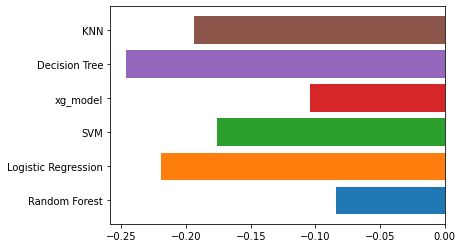

In [43]:
# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot the bar chart
for name, clf in classifiers.items():
    ax.barh(name, scores[name])

# Show the plot
plt.show()

In [44]:
models = [('Logistic Regression', LogisticRegression()), 
          ("KNN" , KNeighborsClassifier()), 
          ('Random Forest', RandomForestClassifier()),
          ("SVM", SVC()),
          ("XGBoost", XGBClassifier())]

# Create an empty list to store the dictionaries representing each model
data = []

# Loop through the models and calculate the accuracy score for each one
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1=f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)

  data.append({'model': name, 'accuracy': accuracy, 'f1 score':f1, "roc auc score":auc})

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)

# View the first few rows of the dataframe
df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy,f1 score,roc auc score
0,Logistic Regression,0.831081,0.828532,0.831434
1,KNN,0.821622,0.848624,0.819361
2,Random Forest,0.924324,0.923077,0.924712
3,SVM,0.860811,0.859097,0.861132
4,XGBoost,0.901351,0.898752,0.901863


**Tuning** **Hyperparameters**

In [45]:
# Tuning XGBoost Classifier
grid3 = {'n_estimators': [100,150,200,250,300,350,400,450,500],
              'learning_rate': [0.01, 0.5,0.2, 1.0],
              'subsample': [0.3,0.5, 0.6,0.8,1.0],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.2,0.5, 0.4,0.8,1.0],
              'min_child_weight': [1, 2, 3, 4]}
xgb = RandomizedSearchCV(XGBClassifier(),
                             param_distributions = grid3,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
xgb.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=1,
                   param_distributions={'colsample_bytree': [0.2, 0.5, 0.4, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.5, 0.2, 1.0],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500],
                                        'subsample': [0.3, 0.5, 0.6, 0.8, 1.0]},
                   scoring='recall', verbose=1)

In [46]:
xgb.best_params_

{'subsample': 1.0,
 'n_estimators': 400,
 'min_child_weight': 2,
 'max_depth': 8,
 'learning_rate': 0.2,
 'colsample_bytree': 0.4}

Accuracy: 91.62%
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       365
           1       0.95      0.88      0.91       375

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

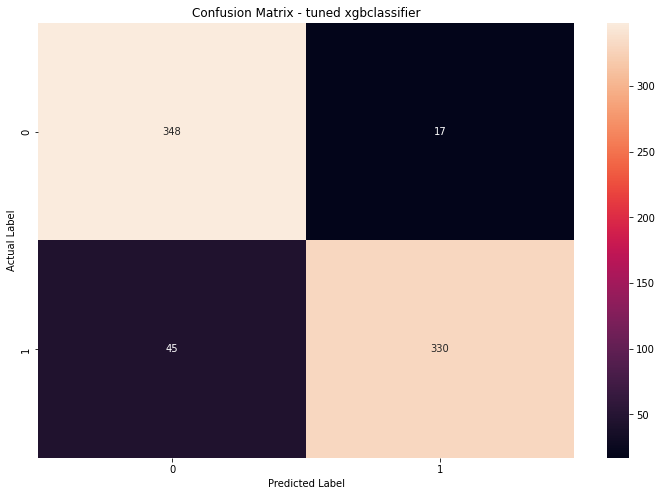

In [47]:
tuned_xgb = XGBClassifier(**xgb.best_params_)
tuned_xgb.fit(X_train,y_train)
y_pred = tuned_xgb.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print(classification_report(y_test, y_pred))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned xgbclassifier')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [48]:
#MODEL OPTIMAL PARAMETER SELECTION USING GRID SEARCH CV

model_params ={
    'RandomForestClassifier':
    {
        'model':RandomForestClassifier(),
        'param':
        {
         'n_estimators':[10 ,50 ,100,130],
         'criterion':['gini' ,'entropy'],
         'max_depth':range(4,8,1),
         'max_features':['auto' ,'log2']
        }
    },
    'SVC':
    {
        'model':SVC(),
        'param':
        {
            'C':[1,20],
            'gamma':[1,0.1],
            'kernel':['rbf']     
        }
    }
}

In [49]:
scores =[]
for model_name , mp in model_params.items():
    model_sel = GridSearchCV(estimator= mp['model'] ,param_grid= mp['param'] ,cv = 4 ,return_train_score=False)
    model_sel.fit(X_train,y_train)
    
    scores.append({
        'model':model_name,
        'best_score':model_sel.best_score_,
        'best_params':model_sel.best_params_
    })


In [50]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8795155001288992,
  'best_params': {'criterion': 'entropy',
   'max_depth': 7,
   'max_features': 'auto',
   'n_estimators': 130}},
 {'model': 'SVC',
  'best_score': 0.9443773094440148,
  'best_params': {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}}]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       365
           1       0.98      0.98      0.98       375

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

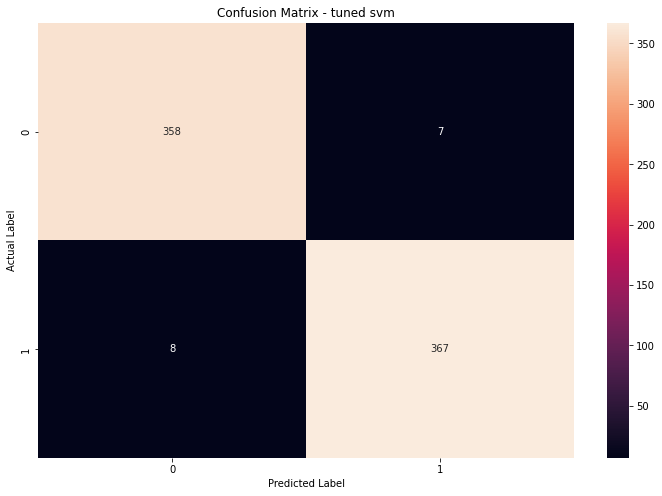

In [51]:
#Tuning SVM
svm_model = SVC(C=20 ,gamma=0.1 ,kernel='rbf')
svm_model.fit(X_train ,y_train)
ytest_pred = svm_model.predict(X_test)
ytrain_pred = svm_model.predict(X_train)
accuracy_score(y_test ,ytest_pred)
print(classification_report(y_test , ytest_pred))
confusion_matrix_model = confusion_matrix(y_test, ytest_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned svm')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       365
           1       0.89      0.83      0.86       375

    accuracy                           0.86       740
   macro avg       0.86      0.86      0.86       740
weighted avg       0.86      0.86      0.86       740



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

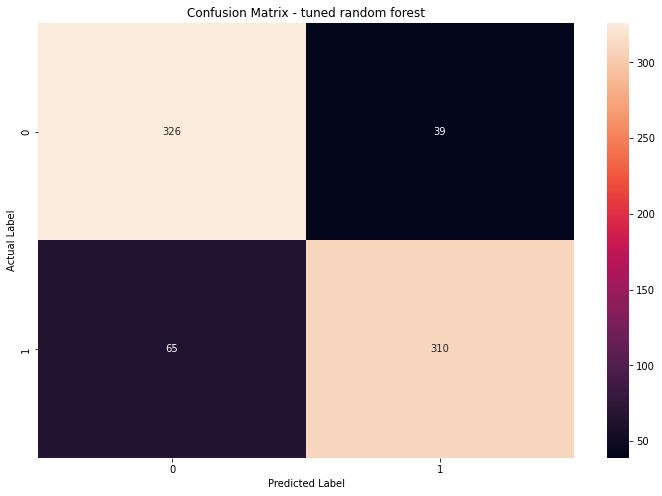

In [52]:
#Tuning Random forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, max_features='log2')
rf_model.fit(X_train ,y_train)
rf_pred = rf_model.predict(X_test)
accuracy_score(y_test ,rf_pred)
print(classification_report(y_test , rf_pred))
confusion_matrix_model = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned random forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [53]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf_model, X_test, y_test)

In [54]:
perm_importance

{'importances_mean': array([ 0.00189189,  0.01297297,  0.00486486,  0.00486486,  0.00567568,
         0.00378378,  0.00108108,  0.01513514,  0.00027027,  0.00459459,
         0.01297297,  0.00810811,  0.00162162,  0.0272973 ,  0.00486486,
         0.00189189, -0.00324324,  0.00567568,  0.00891892,  0.00243243,
        -0.00054054,  0.00297297,  0.04837838,  0.00297297,  0.01378378,
         0.00837838, -0.00189189,  0.00432432,  0.01648649, -0.00216216]),
 'importances_std': array([0.00530997, 0.00137811, 0.0027826 , 0.0027826 , 0.00395371,
        0.00179277, 0.00262037, 0.00711997, 0.00198607, 0.00202252,
        0.00432432, 0.00526854, 0.0030096 , 0.00600706, 0.00250638,
        0.00358554, 0.00108108, 0.00157593, 0.00202252, 0.00198607,
        0.00108108, 0.00262037, 0.00803571, 0.00346115, 0.00335397,
        0.00843486, 0.00517057, 0.00216216, 0.00335397, 0.00326569]),
 'importances': array([[ 0.00540541,  0.00810811, -0.00135135,  0.00405405, -0.00675676],
        [ 0.01351351,

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

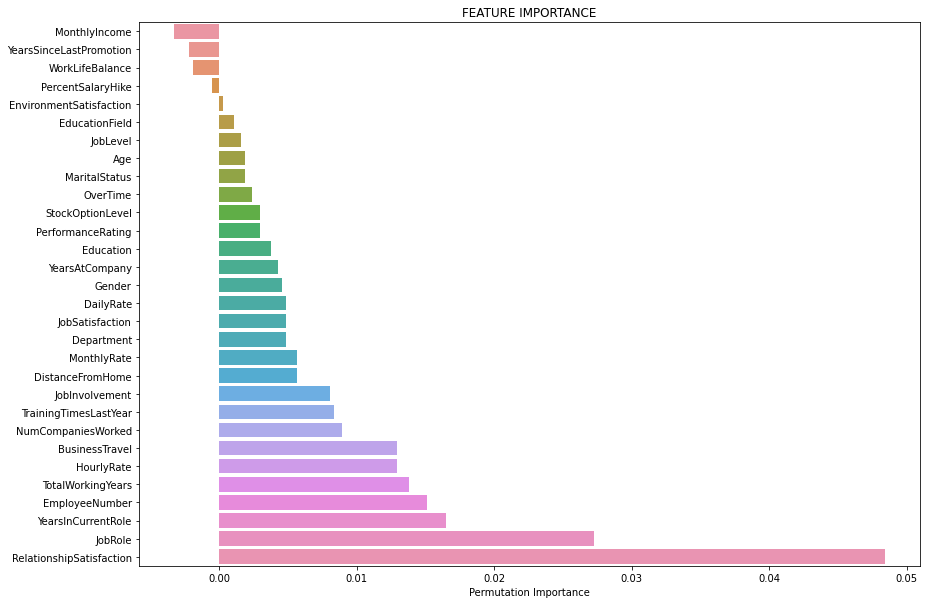

In [55]:
 cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
    
features = np.array(cols)
plt.figure(figsize = (14 ,10))    
sorted_idx = perm_importance.importances_mean.argsort()
sns.barplot( perm_importance.importances_mean[sorted_idx] ,features[sorted_idx] )
plt.xlabel("Permutation Importance")

plt.title('FEATURE IMPORTANCE')